In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="-1"    

import tensorflow as tf
import gym
import numpy as np
import random
from collections import deque
from tqdm.notebook import tqdm
from dqn import DQNAgent

In [2]:
inp = tf.keras.layers.Input(shape=(4))
x = tf.keras.layers.Flatten()(inp)

x = tf.keras.layers.Dense(16,activation="relu")(x)

x = tf.keras.layers.Dense(2,activation="linear")(x)

model = tf.keras.Model(inp, x)
#model.summary()

In [3]:
agent = DQNAgent(
    model = model, 
    n_actions = 2, 
    memory_size = 10000, 
    gamma=0.95,
    p_exploration_decay_factor = 0.999,
    optimizer = tf.keras.optimizers.Adam(0.0005), 
    batch_size = 32, 
    target_model_sync = 100)

In [4]:
num_envs = 10
envs = [gym.make('CartPole-v0') for _ in range(num_envs)]
n_steps = 10000

ret = agent.train(num_steps = n_steps, envs = envs, render = False, warmup=100, train_steps_per_step = 2)

10000/10000 [==============================] - 239s 24ms/step - loss: 2.0023 - mean q: 14.5901 - rewards: 1.0000 - ep_rewards: 54.8496 - n_ep: 1809.0000


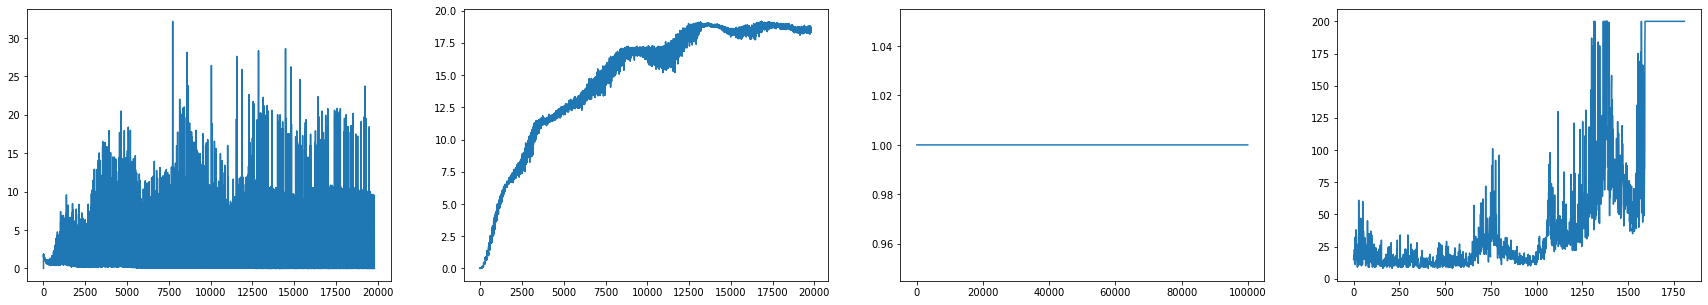

In [5]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,4,figsize=(30,5))
ax[0].plot(ret[0])
#ax[0].plot([np.mean(ret[0][-10:i]) for i in range(11,len(ret[0]))])
ax[1].plot(ret[1])
ax[2].plot(ret[2])
ax[3].plot(ret[3])

In [6]:
#_ = agent.train(999, [envs[0]], render = True)